In [1]:
import os

os.environ['SNORKELDB'] = 'postgres://localhost:5432/scratch'

from snorkel import SnorkelSession
session = SnorkelSession()

In [2]:
from snorkel.semantic import CDRModel
from snorkel.models import candidate_subclass

parallelism = 3
seed = 0

ChemicalDisease = candidate_subclass('ChemicalDisease', ['chemical', 'disease'])

sm = CDRModel(session, candidate_class=ChemicalDisease, parallelism=parallelism, seed=seed)

In [3]:
sm.parse(max_docs=10)

Clearing existing...
Running UDF...
[========================================] 100%
Documents: 10
Sentences: 76


In [4]:
sm.extract()

Clearing existing...
Running UDF...
[========================================] 100%
Candidates [Split 0]: 55


In [5]:
sm.load_gold()

AnnotatorLabels created: 55
AnnotatorLabels created: 0
AnnotatorLabels created: 0


In [6]:
sm.featurize()

Clearing existing...
Running UDF...
[========================================] 100%
Featurized split 0: (55,1684) sparse matrix


In [7]:
sm.label(lfs='py')

Clearing existing...
Running UDF...
[========================================] 100%
Labeled split 0: (55,33) sparse matrix


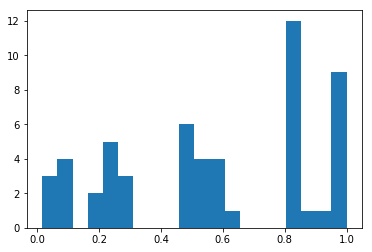

Saved 55 training marginals


In [8]:
sm.generative(model_dep=False)

In [9]:
sm.discriminative(model='logreg')

Initialized RandomSearch search of size 20. Search space size = 125.
[1] Testing lr = 1.00e-03, l1_penalty = 1.00e-02, l2_penalty = 1.00e-06
[SparseLR] lr=0.001 l1=0.01 l2=1e-06
[SparseLR] Building model
[SparseLR] Training model
[SparseLR] #examples=34  #epochs=50  batch size=34
[SparseLR] Epoch 0 (0.12s)	Avg. loss=0.684206	NNZ=1684
[SparseLR] Epoch 25 (0.18s)	Avg. loss=0.514477	NNZ=1684
[SparseLR] Epoch 49 (0.23s)	Avg. loss=0.471494	NNZ=1684
[SparseLR] Training done (0.23s)
[SparseLR] Model saved. To load, use name
		SparseLR_0
[2] Testing lr = 1.00e-06, l1_penalty = 1.00e-02, l2_penalty = 1.00e-03
[SparseLR] lr=1e-06 l1=0.01 l2=0.001
[SparseLR] Building model
[SparseLR] Training model
[SparseLR] #examples=34  #epochs=50  batch size=34
[SparseLR] Epoch 0 (0.11s)	Avg. loss=0.671605	NNZ=1684
[SparseLR] Epoch 25 (0.16s)	Avg. loss=0.671274	NNZ=1684
[SparseLR] Epoch 49 (0.22s)	Avg. loss=0.670956	NNZ=1684
[SparseLR] Training done (0.22s)
[3] Testing lr = 1.00e-06, l1_penalty = 1.00e-04, l2